# Laptop Price

### 1. Problem Definition
**By Getting observation from Feature we are going to predict the value of laptops**
### 2. Data
**Got this dataset from kaggle here is the link**
https://www.kaggle.com/datasets/muhammetvarl/laptop-price
### 3. Evaluation
**As always we will fully try to get over accuracy to 95%**
### 4. Features
1. Company- String -Laptop Manufacturer
2. Product -String -Brand and Model
3. TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)
4. Inches -Numeric- Screen Size
5. ScreenResolution -String- Screen Resolution
6. Cpu- String -Central Processing Unit (CPU)
7. Ram -String- Laptop RAM
8. Memory -String- Hard Disk / SSD Memory
9. GPU -String- Graphics Processing Units (GPU)
10. OpSys -String- Operating System
11. Weight -String- Laptop Weight

In [1]:
#Some necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Lets Load out dataset
df=pd.read_csv('laptop_price.csv',encoding='latin-1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
#Check states
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


# Lets Clean

In [6]:
def weight(x):
    one=x.split('k')[0]
    return (float(one))

In [7]:
df['Weight']=df['Weight'].apply(weight) ##From string to float

In [8]:
#Lets try with Ram lets check whether all Ram Spaces are in GB
df['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [9]:
def ram(x):
    one=x.split('G')[0]
    return (int(one))
df['Ram']=df['Ram'].apply(ram) ##From string to float

In [10]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [11]:
df.rename(columns = {'Ram':'Ram_GB', 'Weight':'Weight_KG'}, inplace = True)

In [12]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram_GB            1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight_KG         1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 132.5+ KB


**No need of Feature 'laptop_ID' lets drop it**

In [14]:
df.drop('laptop_ID',inplace=True,axis=1)

### Lets get visualization

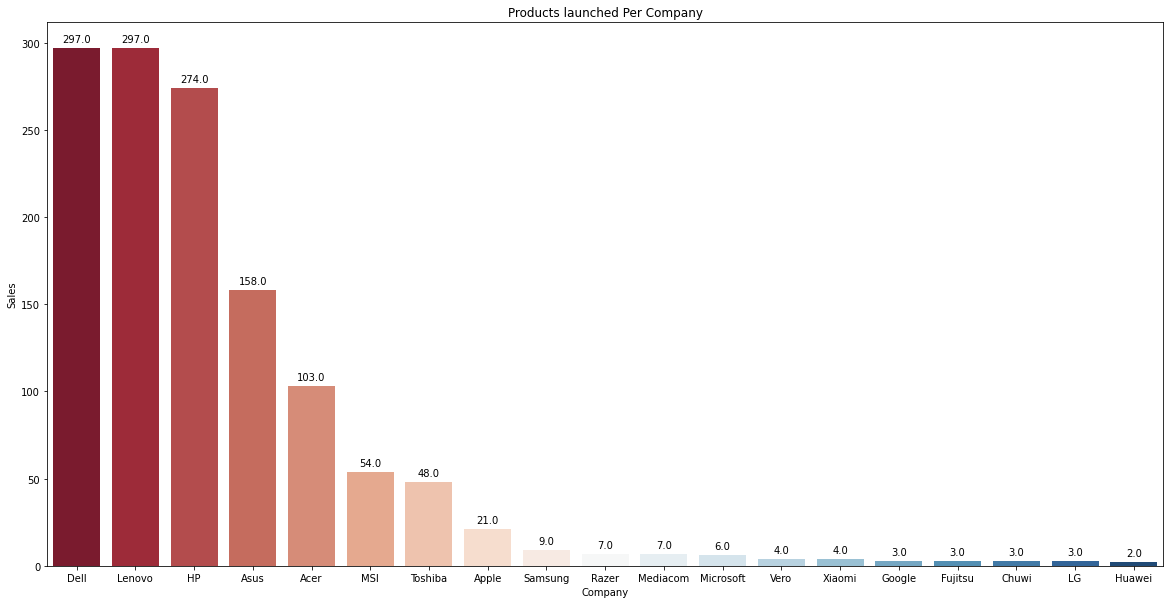

In [15]:
df_sale=df.groupby('Company')['Company'].count()
df_sale=pd.DataFrame(df_sale)
df_sale.rename({'Company':'Sales'},inplace=True,axis=1)
df_sale.sort_values(by='Sales',axis=0,ascending=False,inplace=True)
plt.figure(figsize = (20,10))
b=sns.barplot(x=df_sale.index,y=df_sale['Sales'],palette = 'RdBu')
for p in b.patches:
    b.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Products launched Per Company');

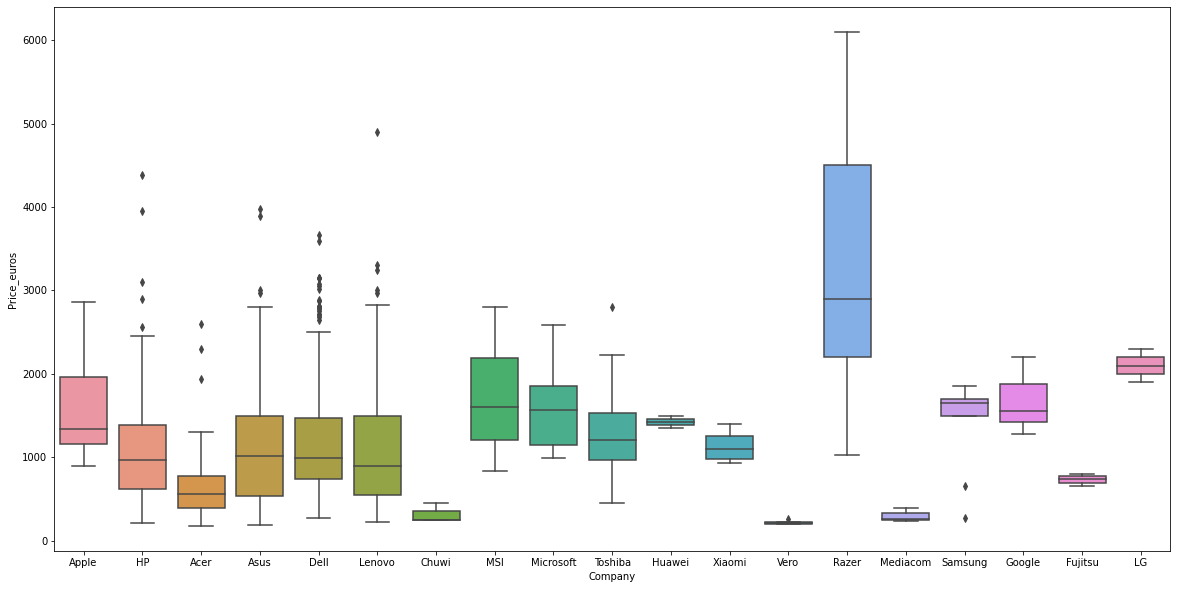

In [16]:
plt.figure(figsize = (20,10))
sns.boxplot(x = "Company", y= "Price_euros",data=df);

In [17]:
#String to Numerical
def preprocess(df):
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label]=content.astype('category').cat.as_ordered()
            df[label+'_is_missing']=pd.isnull(content)
            df[label]=pd.Categorical(content).codes
    return df

In [18]:
df_tmp=preprocess(df)
df_tmp.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,Company_is_missing,Product_is_missing,TypeName_is_missing,ScreenResolution_is_missing,Cpu_is_missing,Memory_is_missing,Gpu_is_missing,OpSys_is_missing
0,1,300,4,13.3,23,65,8,4,58,8,1.37,1339.69,False,False,False,False,False,False,False,False
1,1,301,4,13.3,1,63,8,2,51,8,1.34,898.94,False,False,False,False,False,False,False,False
2,7,50,3,15.6,8,74,8,16,53,4,1.86,575.00,False,False,False,False,False,False,False,False
3,1,300,4,15.4,25,85,16,29,9,8,1.83,2537.45,False,False,False,False,False,False,False,False
4,1,300,4,13.3,23,67,8,16,59,8,1.37,1803.60,False,False,False,False,False,False,False,False


In [19]:
#Lets split the data
from sklearn.model_selection import train_test_split
x=df_tmp.drop('Price_euros',axis=1)
y=df_tmp['Price_euros']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# 5. Modelling
**Models Which we will use**
1. sklearn.linear_model.SGDRegressor
2. sklearn.kernel_ridge.KernelRidge
3. sklearn.ensemble.RandomForestRegressor

### 1. sklearn.linear_model.SGDRegressor 

In [20]:
np.random.seed(42)
model_scores={}
from sklearn.linear_model import SGDRegressor
s_model_base=SGDRegressor()
s_model_base.fit(x_train,y_train)
model_scores['SGDRegressor']=s_model_base.score(x_test,y_test)

### 2.  sklearn.kernel_ridge.KernelRidge

In [21]:
np.random.seed(42)
from sklearn.kernel_ridge import KernelRidge
k_model_base=KernelRidge()
k_model_base.fit(x_train,y_train)
model_scores['KernelRidge']=k_model_base.score(x_test,y_test)

### 3.  sklearn.ensemble.RandomForestRegressor

In [22]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
r_model_base=RandomForestRegressor(n_estimators=81)
r_model_base.fit(x_train,y_train)
model_scores['RandomForestRegressor']=r_model_base.score(x_test,y_test)
model_scores

{'SGDRegressor': -9.077731392553382e+20,
 'KernelRidge': 0.7156393265543257,
 'RandomForestRegressor': 0.8932416579502488}

**We are just going to improve Random Forest Regressor**

* **GridSearchCV**

In [23]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
r_model_grid={'criterion':['squared_error', 'absolute_error', 'poisson'],
        'max_depth':[None,5,10,20,30],
        'max_features':[1,'sqrt'],
       'min_samples_leaf':[1,2,4],
       'min_samples_split':[2,4,6],
             'n_jobs':[-1]}
r_model_improved=GridSearchCV(estimator=RandomForestRegressor(),
                             param_grid=r_model_grid,
                             verbose=True,
                              cv=5
                             )
r_model_improved.fit(x_train,y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [None, 5, 10, 20, 30],
                         'max_features': [1, 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6], 'n_jobs': [-1]},
             verbose=True)

In [25]:
r_model_improved.score(x_test,y_test)

0.8450843372172271

**No improvement but reduced the accuracy lets move for n_estimater both with  improved and ideal models** 

In [26]:
#ideal
np.random.seed(42)
for i in range(1,150,2):
    clf=RandomForestRegressor(n_estimators=i)
    clf.fit(x_train,y_train)
    print(f"for n_estimator = {i} score = {clf.score(x_test,y_test)*100:0.2f}")


for n_estimator = 1 score = 71.71
for n_estimator = 3 score = 80.78
for n_estimator = 5 score = 86.38
for n_estimator = 7 score = 84.37
for n_estimator = 9 score = 86.70
for n_estimator = 11 score = 85.57
for n_estimator = 13 score = 87.55
for n_estimator = 15 score = 87.54
for n_estimator = 17 score = 87.20
for n_estimator = 19 score = 87.04
for n_estimator = 21 score = 87.83
for n_estimator = 23 score = 87.58
for n_estimator = 25 score = 88.59
for n_estimator = 27 score = 87.70
for n_estimator = 29 score = 87.73
for n_estimator = 31 score = 88.24
for n_estimator = 33 score = 87.78
for n_estimator = 35 score = 87.87
for n_estimator = 37 score = 87.76
for n_estimator = 39 score = 87.72
for n_estimator = 41 score = 88.21
for n_estimator = 43 score = 86.38
for n_estimator = 45 score = 87.77
for n_estimator = 47 score = 86.71
for n_estimator = 49 score = 86.83
for n_estimator = 51 score = 88.18
for n_estimator = 53 score = 87.92
for n_estimator = 55 score = 87.63
for n_estimator = 57 scor

In [27]:
r_model_improved.best_params_

{'criterion': 'squared_error',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_jobs': -1}

In [28]:
#improved
np.random.seed(42)
for i in range(1,150,2):
    clf=RandomForestRegressor(n_estimators=i,
                             criterion= 'squared_error',
 max_depth= 30,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_jobs= -1)
    clf.fit(x_train,y_train)
    print(f"for n_estimator = {i} score = {clf.score(x_test,y_test)*100:0.2f}")


for n_estimator = 1 score = 62.16
for n_estimator = 3 score = 78.98
for n_estimator = 5 score = 81.90
for n_estimator = 7 score = 80.06
for n_estimator = 9 score = 84.84
for n_estimator = 11 score = 84.24
for n_estimator = 13 score = 84.40
for n_estimator = 15 score = 87.49
for n_estimator = 17 score = 85.72
for n_estimator = 19 score = 82.84
for n_estimator = 21 score = 86.18
for n_estimator = 23 score = 81.35
for n_estimator = 25 score = 84.22
for n_estimator = 27 score = 84.13
for n_estimator = 29 score = 84.91
for n_estimator = 31 score = 84.00
for n_estimator = 33 score = 84.33
for n_estimator = 35 score = 84.64
for n_estimator = 37 score = 83.50
for n_estimator = 39 score = 84.93
for n_estimator = 41 score = 85.42
for n_estimator = 43 score = 84.41
for n_estimator = 45 score = 84.67
for n_estimator = 47 score = 85.62
for n_estimator = 49 score = 85.00
for n_estimator = 51 score = 85.20
for n_estimator = 53 score = 83.01
for n_estimator = 55 score = 83.82
for n_estimator = 57 scor

**So we will move with base model**

In [24]:
def how_accurate(y_test,y_pred):
    from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score
    print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
    print('Mean Square Error: ',mean_squared_error(y_test,y_pred))

In [25]:
clf=RandomForestRegressor(n_estimators=81)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
how_accurate(y_test,y_pred)

Mean Absolute Error:  157.93869120485812
Mean Square Error:  54801.68220969688


In [26]:
clf.score(x_test,y_test)

0.8975721484685596

In [27]:
clf.feature_importances_

array([0.02335991, 0.0572117 , 0.0289849 , 0.01664697, 0.03556503,
       0.07058818, 0.56350515, 0.01817833, 0.06635372, 0.01331413,
       0.10629198, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [28]:
np.random.seed(42)
importance=clf.feature_importances_
def plot_feature(columns,importance):
    df=(pd.DataFrame({'features':columns,'feature_importance':importance}).sort_values('feature_importance',ascending=False)
        .reset_index(drop=True))
    plt.figure(figsize = (20,10))
    b=sns.barplot(y=df['features'],x=df['feature_importance'],palette = 'RdBu')

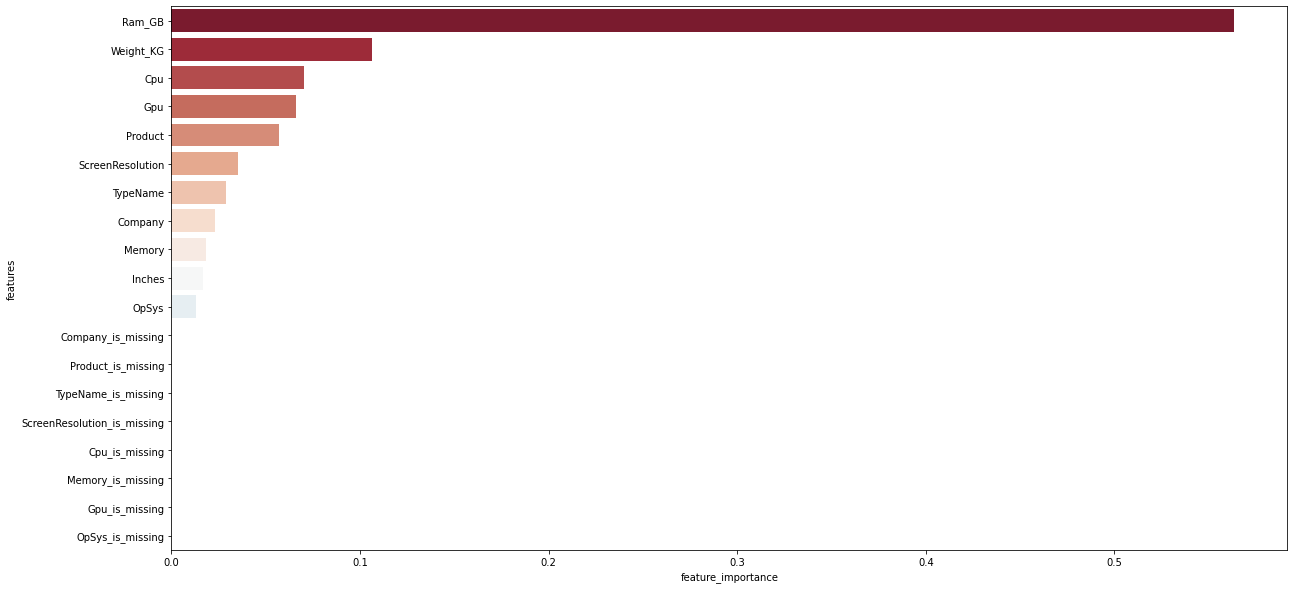

In [29]:
plot_feature(x_train.columns,importance);